# TS-Plasmids Evaluation

In [1]:
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.aesthetics_class import Aesthetics
import seaborn as sns
from matplotlib import pyplot as plt

exp = "20220412"
experiment = Experiment(exp)

## Add the results of the Agarplates for each well
- Collect in a string
- [AB, A, B, WT]
- True = Grew
- Calculate the phenotype based on the agar-strigns


In [2]:
Data = experiment.data
data_a = Data[Data.infected_by_wells.isnull() & (Data.turnover_strain == "A_r") & (Data.treatment_with == "B")].copy() 
data_a["n"] = True
cols = ["phenotype", "n"]
summary = data_a[cols].groupby(cols[:-1]).count().reset_index()
summary = summary[summary.phenotype != "AB_r"].copy()
summary["f"] = summary.n/summary.n.sum()
summary["f [%]"] = round(summary.f*100, 2)
summary

,phenotype,n,f,f [%]
1,A_r,89,0.049944,4.99
2,Other,166,0.093154,9.32
3,S,301,0.168911,16.89
4,U,1226,0.687991,68.80


<Figure size 432x288 with 0 Axes>

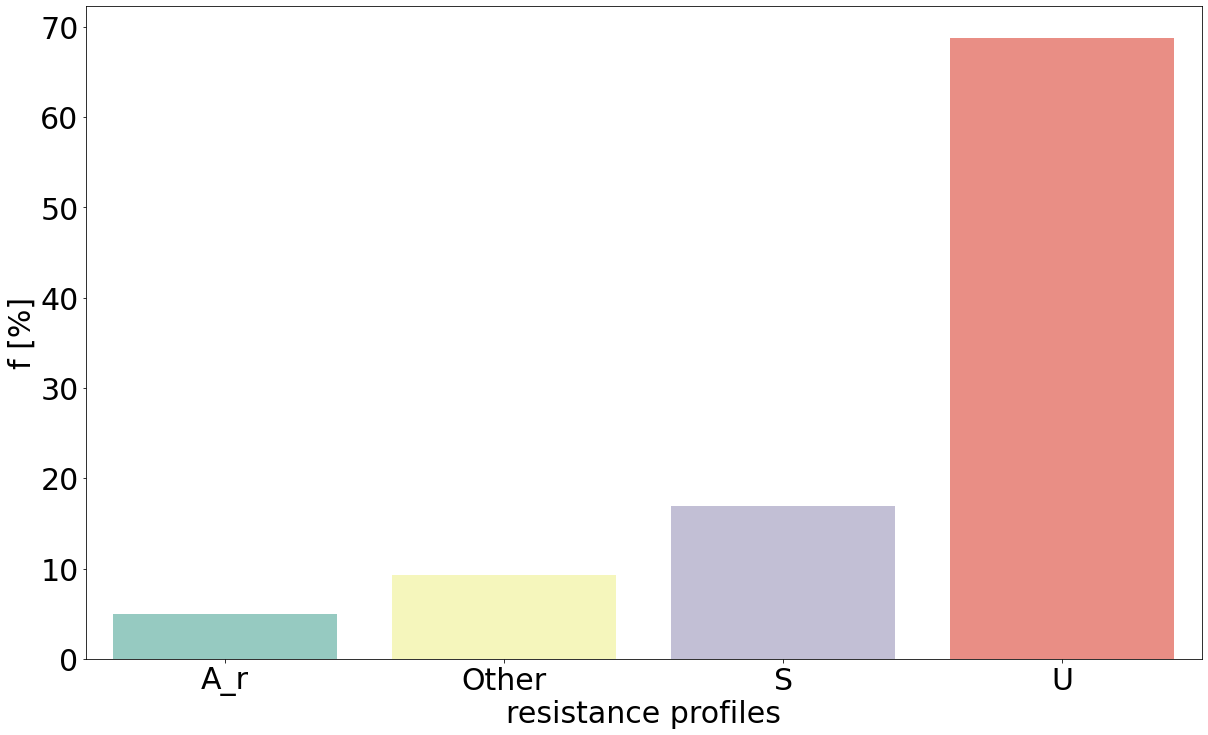

In [3]:
aesthetics = Aesthetics(box = True)
plt.rcParams.update(aesthetics.rcparams)
plt.figure(figsize = (20,12))
g = sns.barplot(data = summary, x = "phenotype", y = "f [%]")
g.set_xlabel("resistance profiles")
experiment.save_figure("Ar_resulting_phenotypes.pdf")

In [4]:
aesthetics = Aesthetics(style = "black", box = True)
plt.rcParams.update(aesthetics.rcparams)

<Figure size 432x288 with 0 Axes>

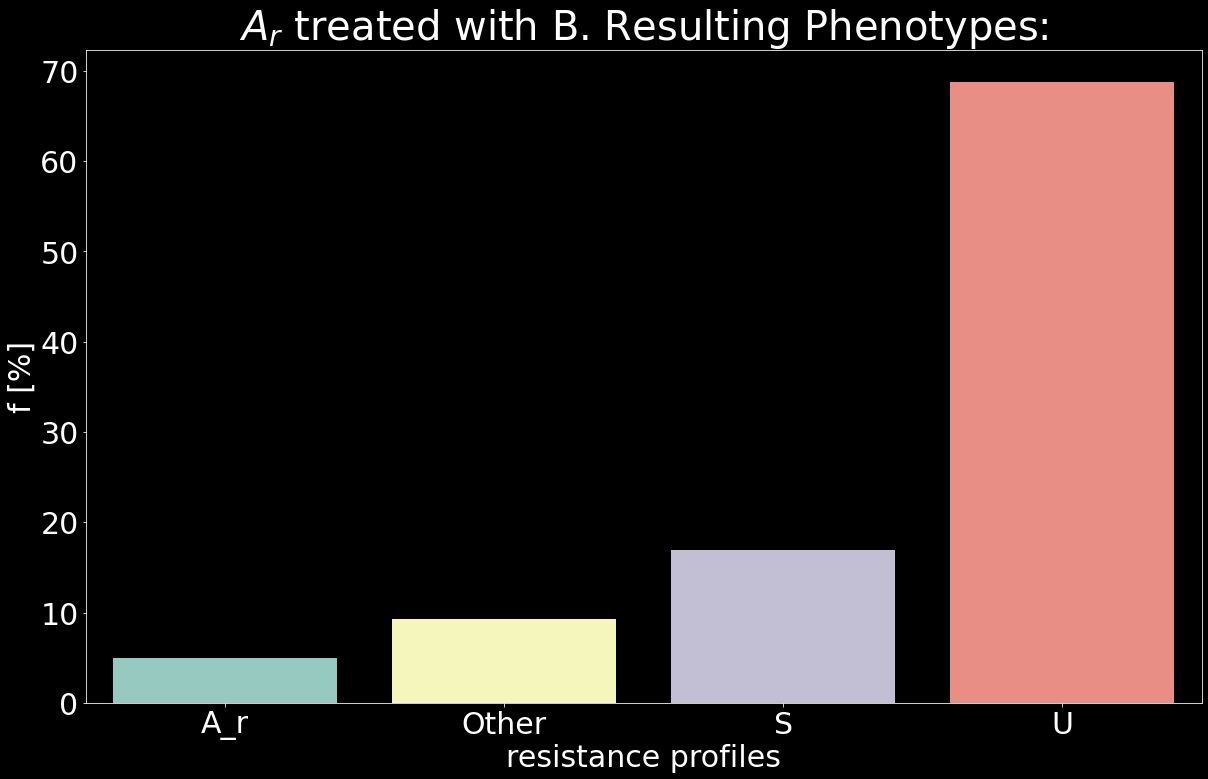

In [5]:
plt.figure(figsize = (20,12))
plt.title("$A_r$ treated with B. Resulting Phenotypes:", fontsize = 40)
g = sns.barplot(data = summary, x = "phenotype", y = "f [%]")
g.set_xlabel("resistance profiles")
experiment.save_figure("Ar_resulting_phenotypes_dark.pdf")

In [6]:
S = 35
A = 25
p = 1/166
dr_N = (1-p)**S
dr_A = (1-p)**A
d_N = 1-dr_N
d_A = 1-dr_A

In [7]:
pU = dr_N * dr_A
pS = d_N * dr_A
pA = d_N * d_A
pO = dr_N * d_A

In [8]:
print(pU, pS, pA, pO)

0.6959072650763555 0.1638906830313553 0.026724662576359484 0.11347738931592981


In [9]:
p

0.006024096385542169